In [1]:
import random
import time
import csv
from datetime import datetime
import mysql.connector
import time
import uuid

In [2]:
# List of possible attack types
attack_types = ['DDoS', 'SQL_Injection', 'Brute_Force', 'Cross_Site_Scripting', 'Normal']

# Function to generate a random source IP address
def generate_ip():
    return f"192.168.1.{random.randint(100, 200)}"

# Function to generate random packet sizes and request frequencies
def generate_attack_features(attack_type):
    if attack_type == 'DDoS':
        return random.randint(100, 1000), random.randint(500, 1000)  # Packet size and request frequency for DDoS
    elif attack_type == 'SQL_Injection':
        return random.randint(50, 200), random.randint(1, 10)  # Packet size and request frequency for SQL Injection
    elif attack_type == 'Brute_Force':
        return random.randint(50, 150), random.randint(10, 20)  # Packet size and request frequency for Brute Force
    elif attack_type == 'Cross_Site_Scripting':
        return random.randint(50, 100), random.randint(1, 5)  # For XSS, usually small size and low frequency
    else:
        return random.randint(10, 50), random.randint(1, 3)  # Normal traffic has small packet sizes and low frequency

# Function to create the database and table if they don't exist
def create_database_and_table():
    try:
        conn = mysql.connector.connect(
            host='localhost', user='root', password='adrde135'
        )
        cursor = conn.cursor()
        
        # Create database if not exists
        cursor.execute("CREATE DATABASE IF NOT EXISTS cyber_attack_simulation")
        cursor.execute("USE cyber_attack_simulation")
        
        # Create table if not exists
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS attack_logs (
                attack_id INT AUTO_INCREMENT PRIMARY KEY,
                attack_type VARCHAR(255),
                source_ip VARCHAR(15),
                target_ip VARCHAR(15),
                request_frequency INT,
                packet_size INT,
                label VARCHAR(10),
                timestamp DATETIME,
                response_time FLOAT
            )
        """)
        
        conn.commit()
        cursor.close()
        conn.close()
        
    except mysql.connector.Error as e:
        print(f"Error creating database or table: {e}")

# Function to simulate an attack and log it to MySQL and CSV
def simulate_attack_to_csv_and_mysql(filename='cyber_attack_logs.csv', num_logs=100):
    # Open CSV file for writing (if the file doesn't exist, it will be created)
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write CSV header
        writer.writerow(['attack_type', 'source_ip', 'target_ip', 'request_frequency', 'packet_size', 'timestamp', 'label'])

        # Connect to MySQL
        conn = mysql.connector.connect(
            host='localhost', user='root', password='adrde135', database='cyber_attack_simulation'
        )
        cursor = conn.cursor()

        # Generate logs
        for _ in range(num_logs):
            attack_type = random.choice(attack_types)
            source_ip = generate_ip()
            target_ip = "192.168.1.1"  # Assume all attacks are targeted at this IP
            request_frequency, packet_size = generate_attack_features(attack_type)
            timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            label = "attack" if attack_type != 'Normal' else "normal"

            # Log to CSV
            writer.writerow([attack_type, source_ip, target_ip, request_frequency, packet_size, timestamp, label])

            # Log to MySQL
            cursor.execute("""
                INSERT INTO attack_logs (attack_type, source_ip, target_ip, request_frequency, packet_size, label, timestamp) 
                VALUES (%s, %s, %s, %s, %s, %s, %s)
            """, (attack_type, source_ip, target_ip, request_frequency, packet_size, label, timestamp))

            # Get the attack_id of the inserted row
            attack_id = cursor.lastrowid

            # Simulate response time (time taken to mitigate the attack)
            response_time = random.uniform(0.5, 3.0)  # Simulated response time in seconds

            # Update response_time for the inserted log
            cursor.execute("""
                UPDATE attack_logs
                SET response_time = %s
                WHERE attack_id = %s
            """, (response_time, attack_id))

            # Commit after each insert
            conn.commit()

            # Simulate a small delay between logs
            time.sleep(0.1)

        cursor.close()
        conn.close()

    print(f"{num_logs} attack logs have been written to {filename} and MySQL.")

# Create database and table if they don't exist
create_database_and_table()

# Generate 100 simulated attack logs and write them to a CSV file and MySQL
simulate_attack_to_csv_and_mysql()

100 attack logs have been written to cyber_attack_logs.csv and MySQL.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [4]:
# Load the dataset 
data = pd.read_csv('cyber_attack_logs.csv')

# Preprocessing the data
# We only need the relevant features for classification
X = data[['request_frequency', 'packet_size']]  # Features
y = data['label']  # Labels (attack or normal)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

      attack       1.00      1.00      1.00        13
      normal       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (ensure the file exists)
data = pd.read_csv('cyber_attack_logs.csv')

# Check the first few rows of the data
print(data.head())


            attack_type      source_ip    target_ip  request_frequency  \
0           Brute_Force  192.168.1.147  192.168.1.1                 90   
1         SQL_Injection  192.168.1.154  192.168.1.1                114   
2         SQL_Injection  192.168.1.152  192.168.1.1                168   
3           Brute_Force  192.168.1.200  192.168.1.1                 73   
4  Cross_Site_Scripting  192.168.1.184  192.168.1.1                 82   

   packet_size            timestamp   label  
0           20  2024-11-21 09:36:55  attack  
1            5  2024-11-21 09:36:55  attack  
2            4  2024-11-21 09:36:55  attack  
3           16  2024-11-21 09:36:55  attack  
4            2  2024-11-21 09:36:55  attack  


In [13]:
# Check for missing data
print("Missing values in each column:\n", data.isnull().sum())

# Handle missing values
# Option 1: Drop rows with missing critical columns
data_cleaned = data.dropna(subset=['attack_type', 'packet_size', 'request_frequency', 'timestamp'])

# Option 2: Alternatively, we can fill missing values with a placeholder (e.g., 'Unknown' or 0)
# data['attack_type'].fillna('Unknown', inplace=True)
# data['packet_size'].fillna(0, inplace=True)
# data['request_frequency'].fillna(0, inplace=True)

# Remove duplicate rows if any
data_cleaned = data_cleaned.drop_duplicates()

# Ensure the timestamp is in datetime format
data_cleaned['timestamp'] = pd.to_datetime(data_cleaned['timestamp'], errors='coerce')

# Check data types to ensure they are correct
print("Data types:\n", data_cleaned.dtypes)


Missing values in each column:
 attack_type          0
source_ip            0
target_ip            0
request_frequency    0
packet_size          0
timestamp            0
label                0
dtype: int64
Data types:
 attack_type                  object
source_ip                    object
target_ip                    object
request_frequency             int64
packet_size                   int64
timestamp            datetime64[ns]
label                        object
dtype: object


In [14]:
# Extract hour and day of week from the timestamp for further analysis
data_cleaned['hour'] = data_cleaned['timestamp'].dt.hour
data_cleaned['day_of_week'] = data_cleaned['timestamp'].dt.dayofweek

# Example: Duration of attack (if applicable, assuming attack start and end times are present)
# If the data contains 'attack_start' and 'attack_end' columns, we can create a new feature for attack duration.
# data_cleaned['attack_duration'] = (data_cleaned['attack_end'] - data_cleaned['attack_start']).dt.total_seconds()

# Check the first few rows to verify feature extraction
print(data_cleaned.head())


  attack_type      source_ip    target_ip  request_frequency  packet_size  \
0      Normal  192.168.1.101  192.168.1.1                 35            1   
1        DDoS  192.168.1.188  192.168.1.1                819          526   
2        DDoS  192.168.1.148  192.168.1.1                998          951   
3        DDoS  192.168.1.139  192.168.1.1                343          718   
4        DDoS  192.168.1.105  192.168.1.1                639          958   

            timestamp   label  hour  day_of_week  
0 2024-11-20 10:36:50  normal    10            2  
1 2024-11-20 10:36:50  attack    10            2  
2 2024-11-20 10:36:50  attack    10            2  
3 2024-11-20 10:36:51  attack    10            2  
4 2024-11-20 10:36:51  attack    10            2  


In [15]:
# Encode categorical variables (e.g., 'attack_type') into numeric values
data_cleaned['attack_type'] = data_cleaned['attack_type'].astype('category').cat.codes

# Optionally, scale the numeric columns (e.g., 'packet_size', 'request_frequency')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale 'packet_size' and 'request_frequency'
data_cleaned[['packet_size', 'request_frequency']] = scaler.fit_transform(data_cleaned[['packet_size', 'request_frequency']])

# Check the first few rows after transformations
print(data_cleaned.head())


   attack_type      source_ip    target_ip  request_frequency  packet_size  \
0            3  192.168.1.101  192.168.1.1           0.018349     0.000000   
1            2  192.168.1.188  192.168.1.1           0.817533     0.535168   
2            2  192.168.1.148  192.168.1.1           1.000000     0.968400   
3            2  192.168.1.139  192.168.1.1           0.332314     0.730887   
4            2  192.168.1.105  192.168.1.1           0.634047     0.975535   

            timestamp   label  hour  day_of_week  
0 2024-11-20 10:36:50  normal    10            2  
1 2024-11-20 10:36:50  attack    10            2  
2 2024-11-20 10:36:50  attack    10            2  
3 2024-11-20 10:36:51  attack    10            2  
4 2024-11-20 10:36:51  attack    10            2  


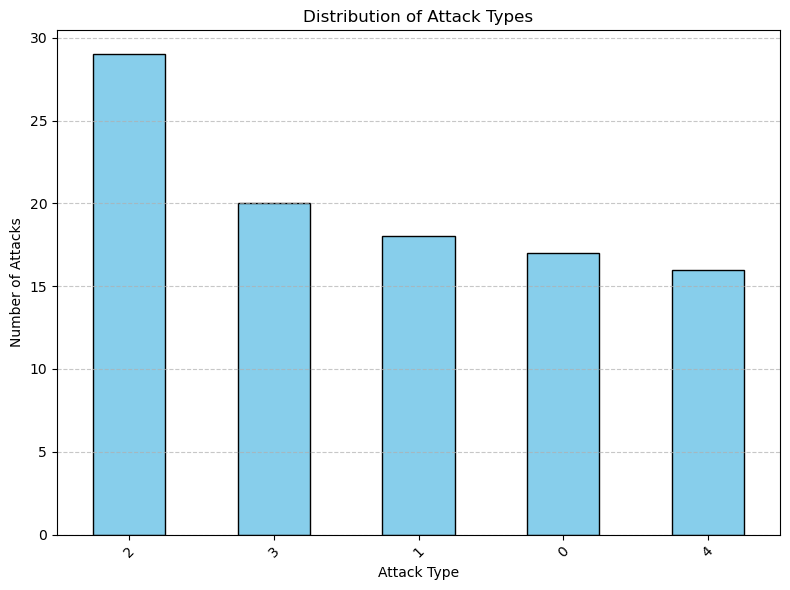

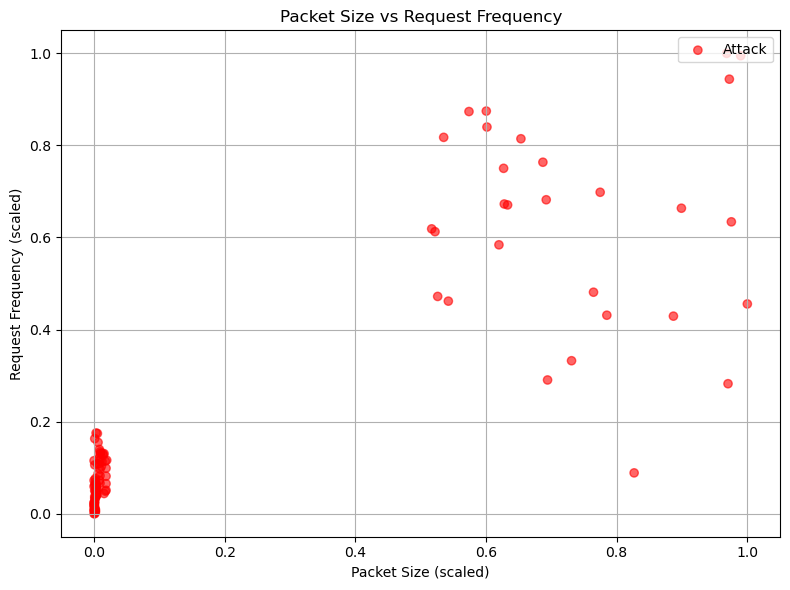

/tmp/ipykernel_11172/2316552711.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_cleaned[data_cleaned['attack_type'] == attack_type]['request_frequency'] for attack_type in attack_types],


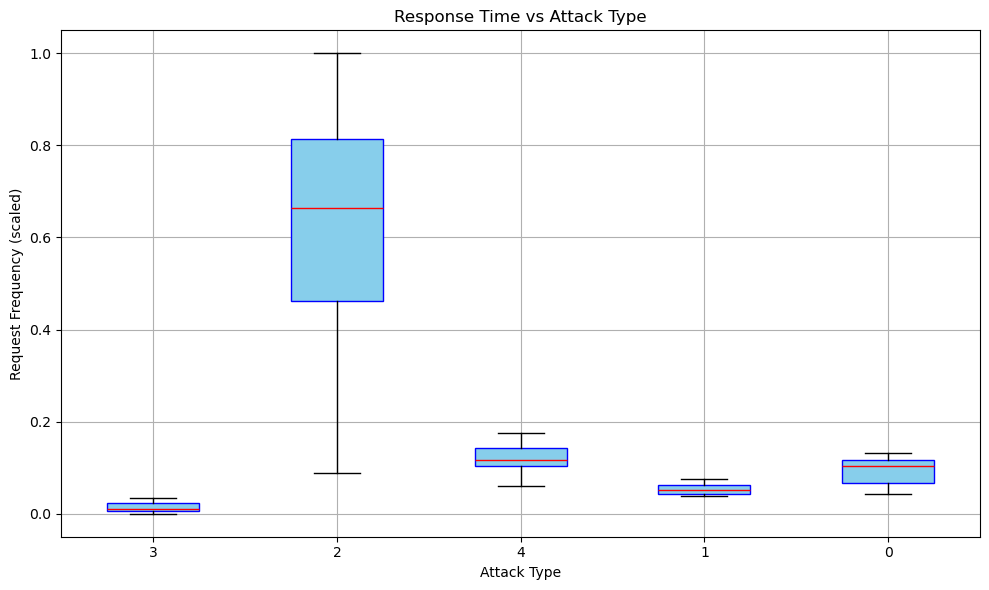

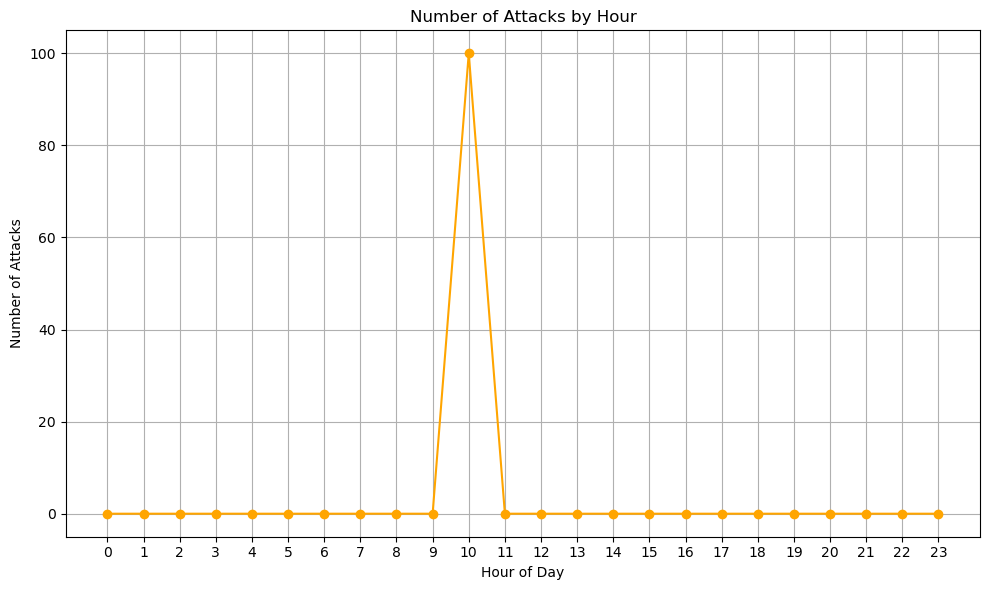

In [16]:
# Graph 1: Distribution of Attack Types (Bar Chart)
def plot_attack_type_distribution():
    attack_counts = data_cleaned['attack_type'].value_counts()

    plt.figure(figsize=(8, 6))
    attack_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Attack Types')
    plt.xlabel('Attack Type')
    plt.ylabel('Number of Attacks')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Graph 2: Packet Size vs Request Frequency (Scatter Plot)
def plot_packet_size_vs_request_frequency():
    plt.figure(figsize=(8, 6))
    plt.scatter(data_cleaned['packet_size'], data_cleaned['request_frequency'], 
                c=data_cleaned['attack_type'].apply(lambda x: 'red' if x != 'Normal' else 'green'), alpha=0.6)
    plt.title('Packet Size vs Request Frequency')
    plt.xlabel('Packet Size (scaled)')
    plt.ylabel('Request Frequency (scaled)')
    plt.legend(['Attack', 'Normal'], loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graph 3: Response Time vs Attack Type (Box Plot)
def plot_response_time_vs_attack_type():
    attack_types = data_cleaned['attack_type'].unique()
    plt.figure(figsize=(10, 6))

    # Boxplot for Response Time by Attack Type
    plt.boxplot([data_cleaned[data_cleaned['attack_type'] == attack_type]['request_frequency'] for attack_type in attack_types],
                labels=attack_types, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                medianprops=dict(color='red'))
    
    plt.title('Response Time vs Attack Type')
    plt.xlabel('Attack Type')
    plt.ylabel('Request Frequency (scaled)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graph 4: Attack Distribution Over Time (Line Plot)
def plot_attack_distribution_over_time():
    hourly_attack_counts = data_cleaned.groupby('hour')['attack_type'].count()

    # Ensure all hours (0-23) are shown, even if some hours have zero attacks
    hourly_attack_counts = hourly_attack_counts.reindex(range(24), fill_value=0)

    plt.figure(figsize=(10, 6))
    hourly_attack_counts.plot(kind='line', marker='o', color='orange')
    plt.title('Number of Attacks by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Attacks')
    plt.xticks(range(24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the functions to plot graphs
if __name__ == "__main__":
    plot_attack_type_distribution()
    plot_packet_size_vs_request_frequency()
    plot_response_time_vs_attack_type()
    plot_attack_distribution_over_time()


In [33]:
import pandas as pd
import random
import mysql.connector
import csv
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [34]:
 #Load the CSV file into a pandas DataFrame
df = pd.read_csv('cyber_attack_logs.csv')

# Show the first few rows of the dataset to check the structure
print(df.head())

# Convert categorical 'attack_type' into numerical values
attack_type_mapping = {
    'DDoS': 1,
    'SQL_Injection': 2,
    'Brute_Force': 3,
    'Cross_Site_Scripting': 4,
    'Normal': 0
}

df['attack_type'] = df['attack_type'].map(attack_type_mapping)

# Now we need to prepare our features (X) and labels (y)
# The features will include: 'request_frequency', 'packet_size', and 'attack_type'
# The label will be: 'label' (attack vs normal)

# Extract features and labels
X = df[['attack_type', 'request_frequency', 'packet_size']]
y = df['label'].map({'attack': 1, 'normal': 0})  # Convert 'attack' to 1 and 'normal' to 0

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally: Save the model for future use
import joblib
joblib.dump(model, 'cyber_attack_model.pkl')


  attack_type      source_ip    target_ip  request_frequency  packet_size  \
0      Normal  192.168.1.101  192.168.1.1                 35            1   
1        DDoS  192.168.1.188  192.168.1.1                819          526   
2        DDoS  192.168.1.148  192.168.1.1                998          951   
3        DDoS  192.168.1.139  192.168.1.1                343          718   
4        DDoS  192.168.1.105  192.168.1.1                639          958   

             timestamp   label  
0  2024-11-20 10:36:50  normal  
1  2024-11-20 10:36:50  attack  
2  2024-11-20 10:36:50  attack  
3  2024-11-20 10:36:51  attack  
4  2024-11-20 10:36:51  attack  
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      

['cyber_attack_model.pkl']

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import mysql.connector
import csv
from datetime import datetime
import time

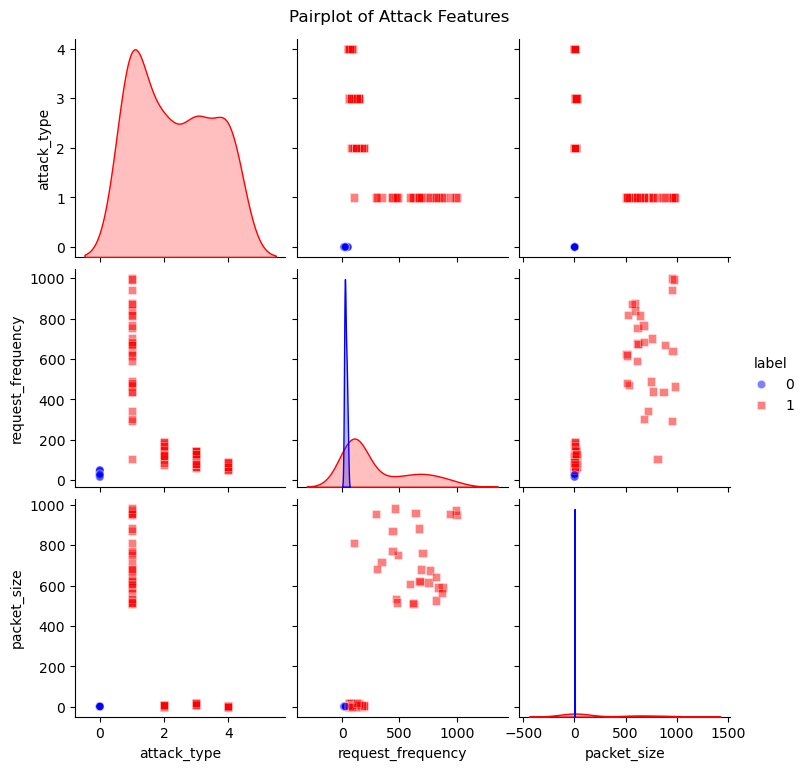

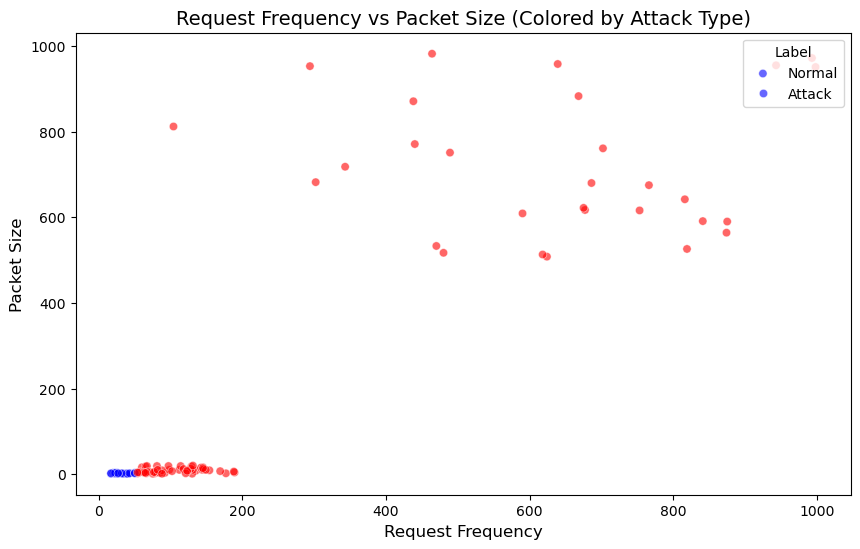

/tmp/ipykernel_11172/2748044608.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attack_type', y='request_frequency', data=df, palette='Set2')
/tmp/ipykernel_11172/2748044608.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attack_type', y='packet_size', data=df, palette='Set2')


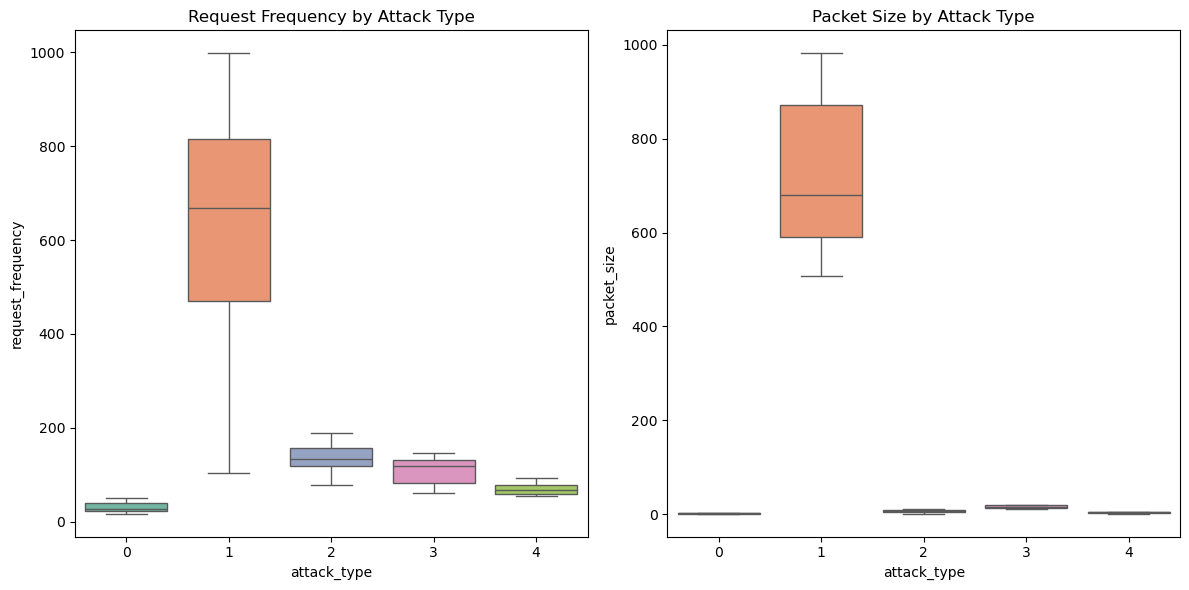

In [36]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('cyber_attack_logs.csv')

# Convert categorical 'attack_type' into numerical values
attack_type_mapping = {
    'DDoS': 1,
    'SQL_Injection': 2,
    'Brute_Force': 3,
    'Cross_Site_Scripting': 4,
    'Normal': 0
}

df['attack_type'] = df['attack_type'].map(attack_type_mapping)

# Convert 'label' (attack vs normal) to binary values (1 for attack, 0 for normal)
df['label'] = df['label'].map({'attack': 1, 'normal': 0})

# Select the relevant columns for plotting
# We'll focus on: 'attack_type', 'request_frequency', 'packet_size', and 'label'
plot_df = df[['attack_type', 'request_frequency', 'packet_size', 'label']]

# Create a pairplot to visualize feature relationships and label separation
sns.pairplot(plot_df, hue='label', palette={0: 'blue', 1: 'red'}, markers=["o", "s"], plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Attack Features", y=1.02)
plt.show()

# Now let's plot individual scatter plots for the relationship between request_frequency and packet_size
# Color points by the attack type (label: attack vs normal)

plt.figure(figsize=(10, 6))

# Scatter plot of request_frequency vs packet_size
sns.scatterplot(data=df, x='request_frequency', y='packet_size', hue='label', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Add titles and labels
plt.title("Request Frequency vs Packet Size (Colored by Attack Type)", fontsize=14)
plt.xlabel("Request Frequency", fontsize=12)
plt.ylabel("Packet Size", fontsize=12)

# Show the plot
plt.legend(title='Label', loc='upper right', labels=['Normal', 'Attack'])
plt.show()

# If you want to visualize the attack types, you can do a boxplot for request_frequency and packet_size
plt.figure(figsize=(12, 6))

# Boxplot for Request Frequency by Attack Type
plt.subplot(1, 2, 1)
sns.boxplot(x='attack_type', y='request_frequency', data=df, palette='Set2')
plt.title('Request Frequency by Attack Type')

# Boxplot for Packet Size by Attack Type
plt.subplot(1, 2, 2)
sns.boxplot(x='attack_type', y='packet_size', data=df, palette='Set2')
plt.title('Packet Size by Attack Type')

plt.tight_layout()
plt.show()

Cluster centers:
[[-1.5479146  -0.72264698 -0.57108351]
 [-0.84431705  1.44035636  1.7486054 ]
 [ 0.71282505 -0.3889975  -0.54754552]]
Cluster labels:
cluster
2    61
1    24
0    15
Name: count, dtype: int64


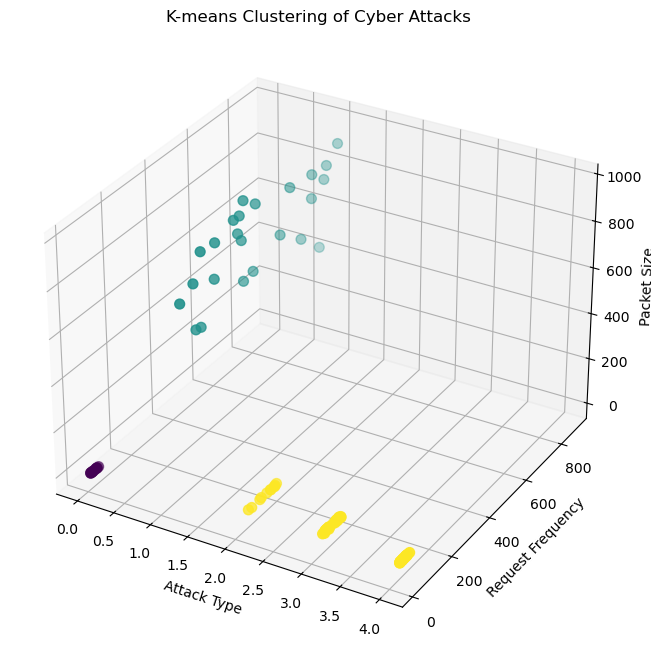

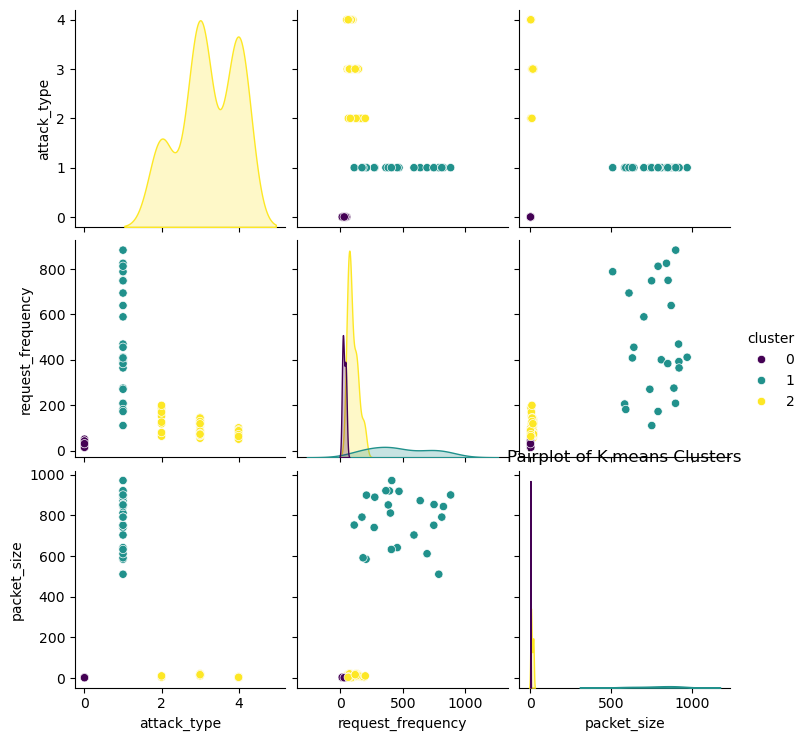

The new data belongs to cluster 1


In [23]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('cyber_attack_logs_output.csv')  # Update the file name if needed

# Preprocessing: Convert categorical attack_type into numerical values
attack_type_mapping = {
    'DDoS': 1,
    'SQL_Injection': 2,
    'Brute_Force': 3,
    'Cross_Site_Scripting': 4,
    'Normal': 0
}
df['attack_type'] = df['attack_type'].map(attack_type_mapping)

# Feature columns: 'attack_type', 'request_frequency', 'packet_size'
X = df[['attack_type', 'request_frequency', 'packet_size']]

# Feature Scaling: Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
n_clusters = 3  # You can experiment with the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)  # Assign cluster labels to each row

# Print some details about the clustering results
print(f"Cluster centers:\n{kmeans.cluster_centers_}")
print(f"Cluster labels:\n{df['cluster'].value_counts()}")

# Visualize the clusters (3D scatter plot)
# If there are more than 2 features, use a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['attack_type'], df['request_frequency'], df['packet_size'], c=df['cluster'], cmap='viridis', s=50)
ax.set_xlabel('Attack Type')
ax.set_ylabel('Request Frequency')
ax.set_zlabel('Packet Size')
ax.set_title('K-means Clustering of Cyber Attacks')

plt.show()

# Optional: Show the clusters in a pairplot (2D visualization)
sns.pairplot(df, hue='cluster', vars=['attack_type', 'request_frequency', 'packet_size'], palette='viridis')
plt.title("Pairplot of K-means Clusters")
plt.show()

# Example: Predicting the cluster for new data
new_data = pd.DataFrame({
    'attack_type': [1],  # DDoS
    'request_frequency': [500],  # Example request frequency
    'packet_size': [700]  # Example packet size
})

new_data_scaled = scaler.transform(new_data)
new_cluster = kmeans.predict(new_data_scaled)
print(f"The new data belongs to cluster {new_cluster[0]}")


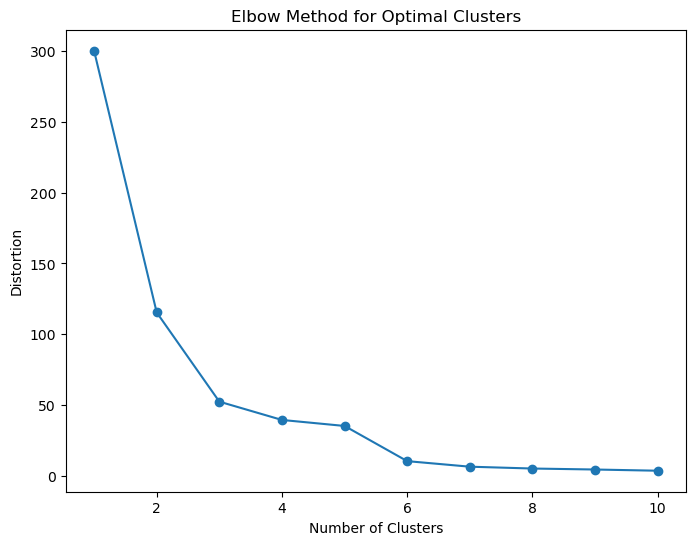

In [24]:
# Elbow Method to determine the optimal number of clusters
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()


/tmp/ipykernel_6430/3138479597.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Mean Squared Error: 0.6223569644281419


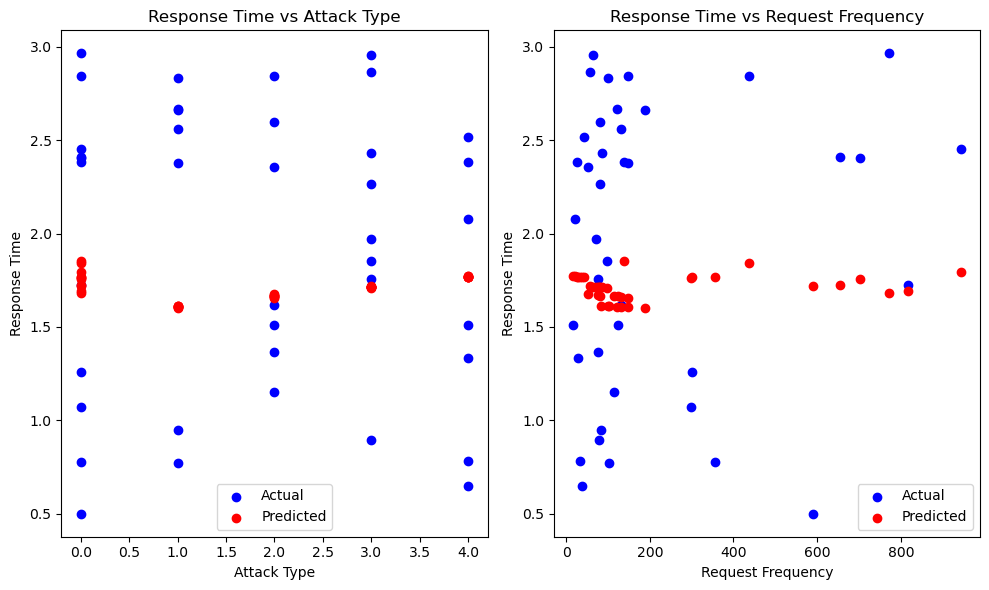

In [2]:
# Function to fetch data from MySQL
def fetch_attack_data_from_mysql():
    conn = mysql.connector.connect(
        host='localhost', user='root', password='adrde135', database='cyber_attack_simulation'  # Update with your MySQL credentials
    )
    query = """
        SELECT attack_type, request_frequency, packet_size, response_time
        FROM attack_logs
        WHERE response_time IS NOT NULL  -- To avoid null values for response time
    """
    df = pd.read_sql(query, conn)
    conn.close()
    return df

# Fetch data from MySQL
df = fetch_attack_data_from_mysql()

# Convert 'attack_type' to numeric values (e.g., using Label Encoding)
df['attack_type'] = df['attack_type'].map({
    'DDoS': 0,
    'SQL_Injection': 1,
    'Brute_Force': 2,
    'Cross_Site_Scripting': 3,
    'Normal': 4
})

# Prepare features and target variable for regression
X = df[['attack_type', 'request_frequency', 'packet_size']]  # Features
y = df['response_time']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict response times using the test set
y_pred = model.predict(X_test)

# Calculate mean squared error for the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the regression graph (using one feature at a time for simplicity)
plt.figure(figsize=(10, 6))

# Plot response_time vs. attack_type
plt.subplot(1, 2, 1)
plt.scatter(X_test['attack_type'], y_test, color='blue', label='Actual')
plt.scatter(X_test['attack_type'], y_pred, color='red', label='Predicted')
plt.title('Response Time vs Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Response Time')
plt.legend()

# Plot response_time vs. request_frequency
plt.subplot(1, 2, 2)
plt.scatter(X_test['request_frequency'], y_test, color='blue', label='Actual')
plt.scatter(X_test['request_frequency'], y_pred, color='red', label='Predicted')
plt.title('Response Time vs Request Frequency')
plt.xlabel('Request Frequency')
plt.ylabel('Response Time')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

Mean Squared Error: 0.6066433284520718


/tmp/ipykernel_6430/3972663836.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


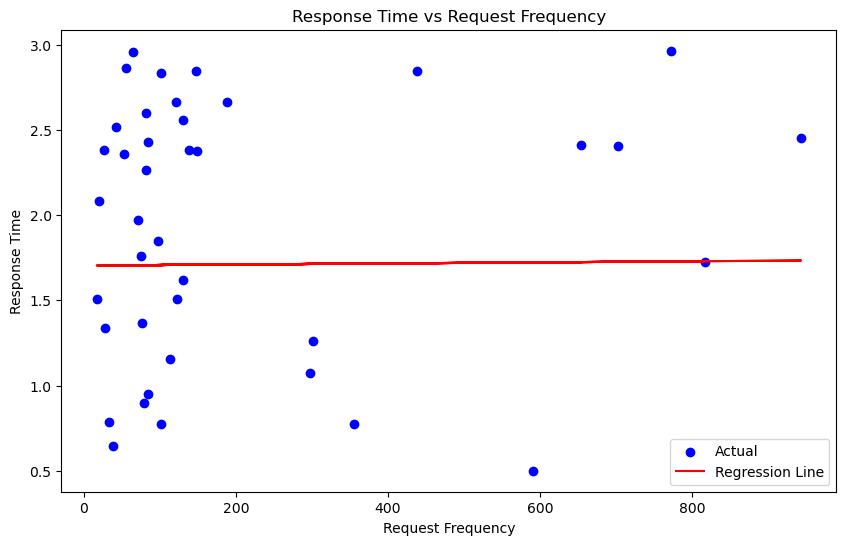

In [4]:
# Function to fetch data from MySQL
def fetch_attack_data_from_mysql():
    conn = mysql.connector.connect(
        host='localhost', user='root', password='adrde135', database='cyber_attack_simulation'  # Update with your MySQL credentials
    )
    query = """
        SELECT attack_type, request_frequency, packet_size, response_time
        FROM attack_logs
        WHERE response_time IS NOT NULL  -- To avoid null values for response time
    """
    df = pd.read_sql(query, conn)
    conn.close()
    return df

# Fetch data from MySQL
df = fetch_attack_data_from_mysql()

# Convert 'attack_type' to numeric values (e.g., using Label Encoding)
df['attack_type'] = df['attack_type'].map({
    'DDoS': 0,
    'SQL_Injection': 1,
    'Brute_Force': 2,
    'Cross_Site_Scripting': 3,
    'Normal': 4
})

# Prepare features and target variable for regression
X = df[['attack_type', 'request_frequency', 'packet_size']]  # Features
y = df['response_time']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train[['request_frequency']], y_train)  # Using only 'request_frequency' for the regression line

# Predict response times using the test set
y_pred = model.predict(X_test[['request_frequency']])

# Calculate mean squared error for the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the regression graph (Response Time vs Request Frequency)
plt.figure(figsize=(10, 6))

# Scatter plot for actual response times vs. request_frequency
plt.scatter(X_test['request_frequency'], y_test, color='blue', label='Actual')

# Plot the regression line (predicted response times based on request_frequency)
plt.plot(X_test['request_frequency'], y_pred, color='red', label='Regression Line')

plt.title('Response Time vs Request Frequency')
plt.xlabel('Request Frequency')
plt.ylabel('Response Time')
plt.legend()

plt.show()

In [15]:
import mysql.connector
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [26]:
# Connect to the MySQL database and fetch the data
def fetch_attack_data():
    try:
        conn = mysql.connector.connect(
            host='localhost', user='root', password='adrde135', database='cyber_attack_simulation'
        )
        cursor = conn.cursor()
        
        # Fetch data from the attack_logs table
        cursor.execute("SELECT * FROM attack_logs")
        data = cursor.fetchall()
        
        cursor.close()
        conn.close()
        
        # Convert to a pandas DataFrame for easier manipulation
        df = pd.DataFrame(data, columns=['attack_id', 'attack_type', 'source_ip', 'target_ip', 
                                         'request_frequency', 'packet_size', 'label', 'timestamp', 'response_time'])
        return df
    
    except mysql.connector.Error as e:
        print(f"Error fetching data: {e}")
        return None

# Fetch the data
df = fetch_attack_data()

if df is not None:
    print("Data fetched successfully")
else:
    print("Failed to fetch data")

# Preprocess Data
def preprocess_data(df):
    # Encode categorical columns (attack_type and label)
    label_encoder_attack_type = LabelEncoder()
    df['attack_type'] = label_encoder_attack_type.fit_transform(df['attack_type'])

    # Fill missing response time values with the mean (or any suitable method)
    df['response_time'] = df['response_time'].fillna(df['response_time'].mean())

    # Features (X) and Target (y) variables
    X = df[['attack_type', 'request_frequency', 'packet_size']]  # Features for prediction
    y = df['response_time']  # Response time to predict
    
    return X, y, label_encoder_attack_type

# Preprocess the data
X, y, label_encoder_attack_type = preprocess_data(df)

print("Data preprocessing completed")

# Train Models
def train_models(X, y):
    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor model to predict response time
    regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Predict the response time for the test set
    y_pred = regressor.predict(X_test)
    
    # Calculate mean squared error for response time prediction
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for response time prediction: {mse}")

    return regressor, y_pred, X_test, y_test

# Train the regression model
regressor, y_pred, X_test, y_test = train_models(X, y)

# Display the predictions alongside the true values
df_test = pd.DataFrame(X_test, columns=['attack_type', 'request_frequency', 'packet_size'])
df_test['true_response_time'] = y_test
df_test['predicted_response_time'] = y_pred

# Save the predictions to a CSV file
predicted_csv_file = 'predicted_response_times.csv'
df_test.to_csv(predicted_csv_file, index=False)

print(f"Predicted response times saved to {predicted_csv_file}")

# Example prediction for a new attack
def predict_new_attack(regressor, label_encoder_attack_type, attack_type, request_frequency, packet_size):
    # Encode the attack type
    attack_type_encoded = label_encoder_attack_type.transform([attack_type])
    
    # Predict response time
    predicted_response_time = regressor.predict([[attack_type_encoded[0], request_frequency, packet_size]])
    
    return predicted_response_time[0]

# Example of predicting the response time for a new attack
new_attack_type = 'Cross_Site_Scripting'  # Example attack type
new_request_frequency = 560  # Example request frequency
new_packet_size = 400  # Example packet size

predicted_response_time = predict_new_attack(regressor, label_encoder_attack_type, new_attack_type, new_request_frequency, new_packet_size)
print(f"Predicted response time for the new attack: {predicted_response_time} seconds")

# Add the new attack to the CSV file
new_attack_data = {
    'attack_type': new_attack_type,
    'request_frequency': new_request_frequency,
    'packet_size': new_packet_size,
    'true_response_time': None,  # Since we don't have the true response time, leave it as None
    'predicted_response_time': predicted_response_time,
    'predicted_attack_type': new_attack_type
}

# Convert the new attack data into a DataFrame
new_attack_df = pd.DataFrame([new_attack_data])

# Read the existing CSV file with predictions
existing_df = pd.read_csv(predicted_csv_file)

# Use pd.concat() to add the new attack prediction to the existing DataFrame
updated_df = pd.concat([existing_df, new_attack_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_df.to_csv(predicted_csv_file, index=False)

print(f"New attack added to {predicted_csv_file}")


Data fetched successfully
Data preprocessing completed
Mean Squared Error for response time prediction: 0.4286314078312606
Predicted response times saved to predicted_response_times.csv
Predicted response time for the new attack: 1.3628886870666657 seconds
New attack added to predicted_response_times.csv


/home/user/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/tmp/ipykernel_6430/2781070856.py:120: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_df = pd.concat([existing_df, new_attack_df], ignore_index=True)


In [17]:
import mysql.connector
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [18]:
# Connect to the MySQL database and fetch the data
def fetch_attack_data():
    try:
        conn = mysql.connector.connect(
            host='localhost', user='root', password='adrde135', database='cyber_attack_simulation'
        )
        cursor = conn.cursor()
        
        # Fetch data from the attack_logs table
        cursor.execute("SELECT * FROM attack_logs")
        data = cursor.fetchall()
        
        cursor.close()
        conn.close()
        
        # Convert to a pandas DataFrame for easier manipulation
        df = pd.DataFrame(data, columns=['attack_id', 'attack_type', 'source_ip', 'target_ip', 
                                         'request_frequency', 'packet_size', 'label', 'timestamp', 'response_time'])
        return df
    
    except mysql.connector.Error as e:
        print(f"Error fetching data: {e}")
        return None

# Fetch the data
df = fetch_attack_data()

if df is not None:
    print("Data fetched successfully")
else:
    print("Failed to fetch data")

# Preprocess Data
def preprocess_data(df):
    # Encode categorical columns (attack_type and label)
    label_encoder_attack_type = LabelEncoder()
    df['attack_type'] = label_encoder_attack_type.fit_transform(df['attack_type'])

    # Fill missing response time values with the mean (or any suitable method)
    df['response_time'] = df['response_time'].fillna(df['response_time'].mean())

    # Features (X) and Target (y) variables
    X = df[['attack_type', 'request_frequency', 'packet_size']]  # Features for prediction
    y = df['response_time']  # Response time to predict
    
    return X, y, label_encoder_attack_type

# Preprocess the data
X, y, label_encoder_attack_type = preprocess_data(df)

print("Data preprocessing completed")

# Train Models
def train_models(X, y):
    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor model to predict response time
    regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Predict the response time for the test set
    y_pred = regressor.predict(X_test)
    
    # Calculate mean squared error for response time prediction
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for response time prediction: {mse}")

    return regressor, y_pred, X_test, y_test

# Train the regression model
regressor, y_pred, X_test, y_test = train_models(X, y)

# Create a DataFrame to store the predicted response times and their corresponding attack data
df_test = pd.DataFrame(X_test, columns=['attack_type', 'request_frequency', 'packet_size'])
df_test['true_response_time'] = y_test
df_test['predicted_response_time'] = y_pred

# Add attack type labels (decoded back to original labels for readability)
df_test['predicted_attack_type'] = label_encoder_attack_type.inverse_transform(df_test['attack_type'])

# Output the results to a CSV file
csv_file = 'predicted_response_times.csv'
df_test.to_csv(csv_file, index=False)

print(f"Predicted response times have been saved to {csv_file}")

Data fetched successfully
Data preprocessing completed
Mean Squared Error for response time prediction: 0.4286314078312606
Predicted response times have been saved to predicted_response_times.csv
